# Linear Regression

Linear Regression is a statistical method used in machine learning and data science that predicts a dependent variable based on the values of one or more independent variables. The simplest form of linear regression (simple linear regression) involves two variables: a dependent variable and an independent variable. The case of more than one explanatory variable is called multiple linear regression.

The relationships in linear regression are modeled using linear predictor functions whose unknown model parameters are estimated from the data. The most common form of regression analysis is linear regression, in which a line that best represents the general trend of a dataset is determined.

## Uses of Linear Regression

Linear regression has many practical uses. Most applications fall into one of the following two broad categories:
1. **Determining the strength of predictors**: Linear regression can be used to identify which factors matter most, which can be ignored, and how these factors influence each other.
2. **Forecasting an effect or trend**: Linear regression can be used to forecast effects or trends. This is particularly useful in business, where it can help make decisions about future strategy.

## Examples of Linear Regression

Here are some examples of linear regression in real life:
1. **Business**: Businesses often use linear regression to understand the relationship between advertising spending and revenue. For example, they might fit a simple linear regression model using advertising spending as the predictor variable and revenue as the response variable.
2. **Medical Research**: Medical researchers often use linear regression to understand the relationship between drug dosage and blood pressure of patients. For example, researchers might administer various dosages of a certain drug to patients and observe how their blood pressure responds.
3. **Agriculture**: Agricultural scientists often use linear regression to measure the effect of fertilizer and water on crop yields.
4. **Finance**: Financial analysts often use linear regression to forecast investment returns and understand the operational and financial performance of their organizations.

As a data scientist, understanding linear regression is crucial as it provides a strong foundation for understanding more complex machine learning algorithms. It's also a powerful tool in its own right for making predictions based on a set of related data points.

# Линейная регрессия

Линейная регрессия - это статистический метод, используемый в машинном обучении и науке о данных, который предсказывает зависимую переменную на основе значений одной или нескольких независимых переменных. Простейшая форма линейной регрессии (простая линейная регрессия) включает две переменные: зависимую переменную и независимую переменную. Случай более чем одной объясняющей переменной называется множественной линейной регрессией.

Отношения в линейной регрессии моделируются с использованием линейных предикторных функций, параметры которых оцениваются на основе данных. Наиболее распространенным видом регрессионного анализа является линейная регрессия, в которой определяется линия, которая наилучшим образом представляет общий тренд набора данных.

## Применение линейной регрессии

Линейная регрессия имеет много практических применений. Большинство приложений относятся к одной из следующих двух широких категорий:
1. **Определение силы предикторов**: Линейная регрессия может быть использована для определения того, какие факторы наиболее важны, какие можно игнорировать, и как эти факторы влияют друг на друга.
2. **Прогнозирование эффекта или тренда**: Линейная регрессия может быть использована для прогнозирования эффектов или трендов. Это особенно полезно в бизнесе, где это может помочь принимать решения о будущей стратегии.

## Примеры линейной регрессии

Вот несколько примеров линейной регрессии в реальной жизни:
1. **Бизнес**: Компании часто используют линейную регрессию для понимания связи между рекламными расходами и доходами. Например, они могут построить простую модель линейной регрессии, используя рекламные расходы в качестве предиктора и доходы в качестве отклика.
2. **Медицинские исследования**: Медицинские исследователи часто используют линейную регрессию для понимания связи между дозировкой лекарства и артериальным давлением пациентов. Например, исследователи могут назначить различные дозы определенного лекарства пациентам и наблюдать, как реагирует их артериальное давление.
3. **Сельское хозяйство**: Агрономы часто используют линейную регрессию для измерения влияния удобрений и воды на урожайность.
4. **Финансы**: Финансовые аналитики часто используют линейную регрессию для прогнозирования доходности инвестиций и понимания операционной и финансовой деятельности своих организаций.

Для специалиста по данным понимание линейной регрессии имеет решающее значение, поскольку оно обеспечивает прочную основу для понимания более сложных алгоритмов машинного обучения. Это также мощный инструмент сам по себе для прогнозирования на основе набора связанных точек данных.

Epoch 0, Loss: 10353.7490234375
Epoch 100, Loss: 206.40911865234375
Epoch 200, Loss: 29.124969482421875
Epoch 300, Loss: 26.026756286621094
Epoch 400, Loss: 25.972599029541016
Epoch 500, Loss: 25.971651077270508
Epoch 600, Loss: 25.971635818481445
Epoch 700, Loss: 25.971633911132812
Epoch 800, Loss: 25.971633911132812
Epoch 900, Loss: 25.971633911132812


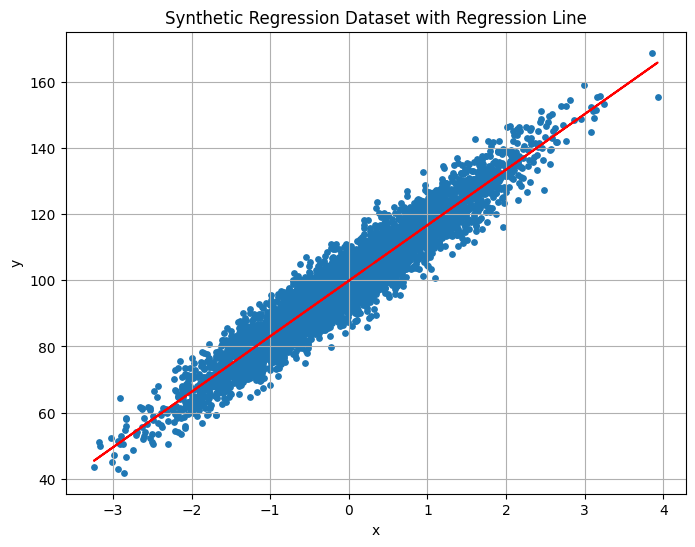

In [8]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

class LinearRegressionModel:
    def __init__(self, n_samples=5000, n_features=1, n_targets=1, noise=5, bias=100):
        """
        Initialize the LinearRegressionModel with a synthetic dataset.

        Parameters:
        n_samples (int): The number of samples.
        n_features (int): The number of features.
        n_targets (int): The number of targets.
        noise (float): The standard deviation of the Gaussian noise applied to the output.
        bias (float): The bias term in the underlying linear model.
        """
        X_numpy, y_numpy, _ = make_regression(
            n_samples=n_samples,
            n_features=n_features,
            n_targets=n_targets,
            noise=noise,
            bias=bias,
            coef=True,
            random_state=42
        )
        self.X = torch.tensor(X_numpy, dtype=torch.float32)
        self.y = torch.tensor(y_numpy, dtype=torch.float32).view(-1, 1)
        self.model = nn.Linear(self.X.shape[1], self.y.shape[1])
        self.criterion = nn.MSELoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=0.01)

    def train(self, epochs=1000):
        """
        Train the model for a number of epochs.

        Parameters:
        epochs (int): The number of epochs to train the model.
        """
        for epoch in range(epochs):
            y_pred = self.model(self.X)
            loss = self.criterion(y_pred, self.y)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss.item()}')
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

    def plot(self):
        """
        Plot the dataset and the learned regression line.
        """
        plt.figure(figsize=(8, 6))
        plt.scatter(self.X.numpy(), self.y.numpy(), s=15)
        plt.plot(self.X.numpy(), self.model(self.X).data.numpy(), color='red')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Synthetic Regression Dataset with Regression Line')
        plt.grid(True)
        plt.show()

# Usage:
lr = LinearRegressionModel()
lr.train()
lr.plot()